# World Happiness Report
## Problem Statement:
### Context
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
##### What is Dystopia?
Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.
##### What are the residuals?
The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 
##### What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 
If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.
You need to predict the happiness score considering all the other factors mentioned in the dataset. 


# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [2]:
df = pd.read_csv(r"C:\Users\dell\DataScience\Data Trained Projects\Project 1\happiness_score_dataset.csv")
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Lets see the shape and info of the detaset

In [3]:
df.shape

(158, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### Let have a statistical summary of the dataset

In [5]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


#### No need to check for null values as we can clearly see there is no null values from the above info

 #### Let drop the unwanted columns

In [6]:
#df.set_index("Happiness Rank", inplace = True)
df = df.drop(columns = 'Happiness Rank')
df.head()

,Country,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
data_columns = ['Country','Region','Happiness Score','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual']

In [8]:
df = df[data_columns].copy()

In [9]:
df.columns = ['country','region','happiness_score','standard_error',
             'gdp','family','health','freedom','trust','generosity','dystopia_residual']
happy_df = df

In [10]:
happy_df.head()

,country,region,happiness_score,standard_error,gdp,family,health,freedom,trust,generosity,dystopia_residual
0,Switzerland,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


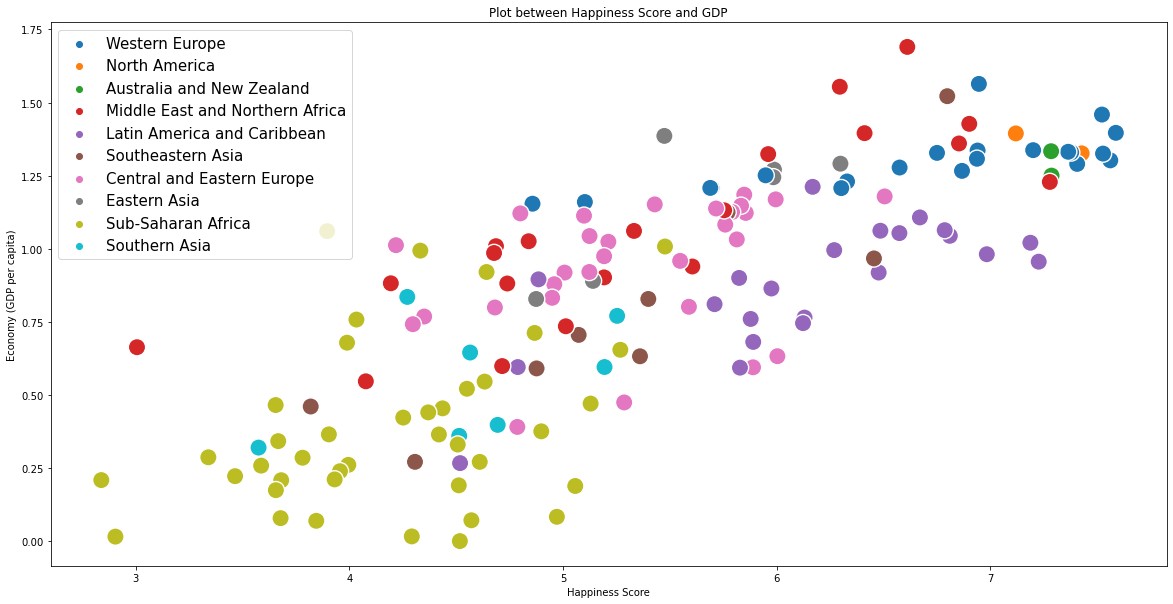

In [11]:
# Plot b/w happiness and GDP

plt.figure(figsize = (20,10))
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x=df.happiness_score, y=df.gdp, hue=happy_df.region, s=300)
plt.legend(loc = 'upper left', fontsize = '15')
plt.xlabel("Happiness Score")
plt.ylabel('Economy (GDP per capita)')

plt.show()

In [12]:
gdp_region = happy_df.groupby('region')['gdp'].sum()
gdp_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: gdp, dtype: float64

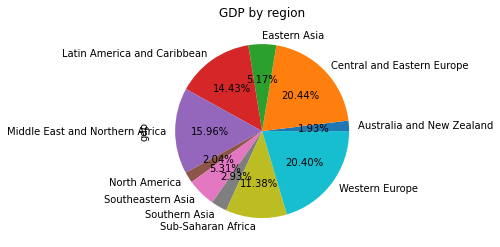

In [13]:
gdp_region.plot.pie(autopct = '%0.2f%%')
plt.title('GDP by region')
plt.show()

In [14]:
# Total contries

total_country = happy_df.groupby('region')[['country']].count()
print(total_country)

                                 country
region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


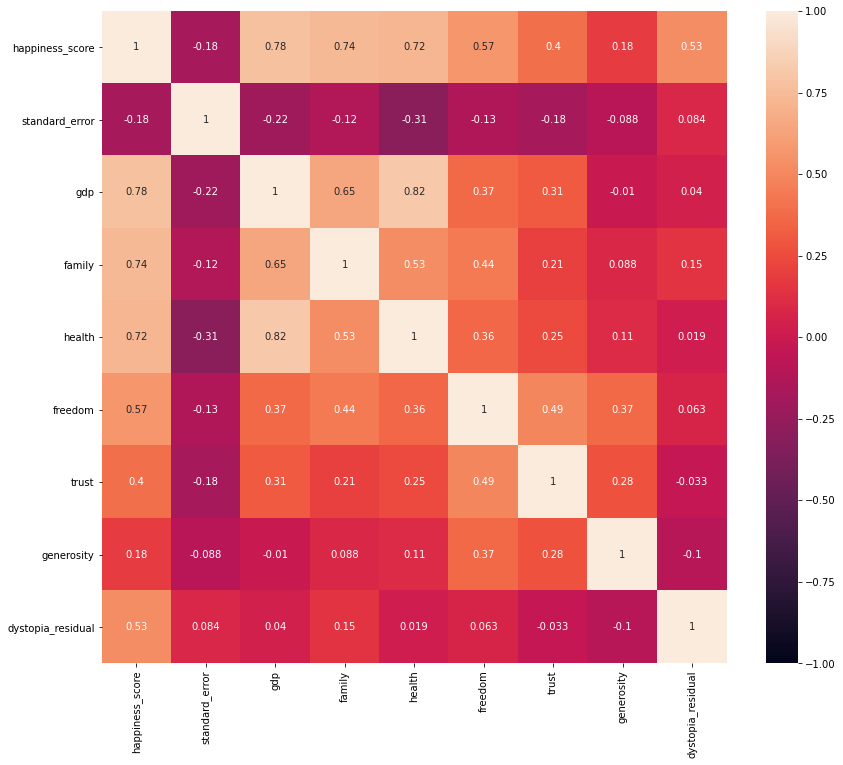

In [15]:
# Correlation map

#cor = happy_df.corr(method = 'pearson')
#f, ax = plt.subplots(figsize = (14,12))
#sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
#annot = True, square = True, ax=ax)

plt.figure(figsize=(14,12))
sns.heatmap(happy_df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [16]:
#corruption in regoins

corruption = happy_df.groupby('region')[['trust']].mean()
corruption

,trust
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


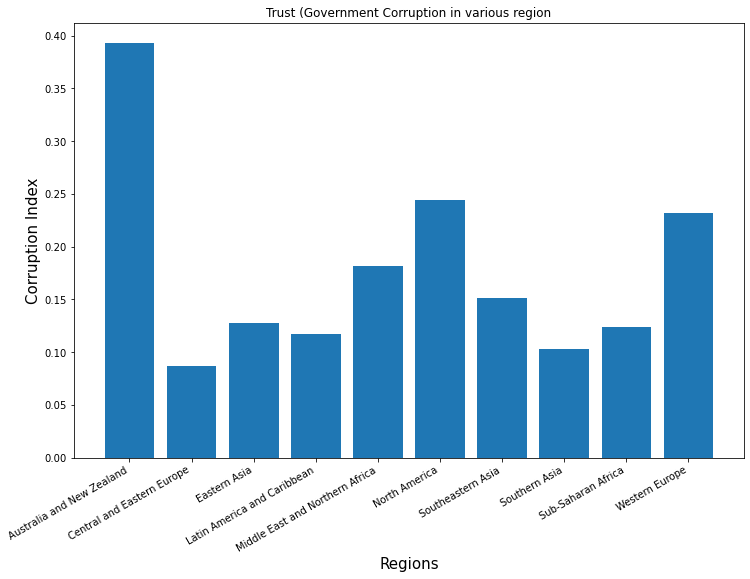

In [17]:
plt.figure(figsize = (12,8))
plt.title('Trust (Government Corruption in various region')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Corruption Index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index, corruption.trust)
plt.show()

In [18]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

Text(603.9818181818181, 0.5, 'Health (Life Expectancy)')

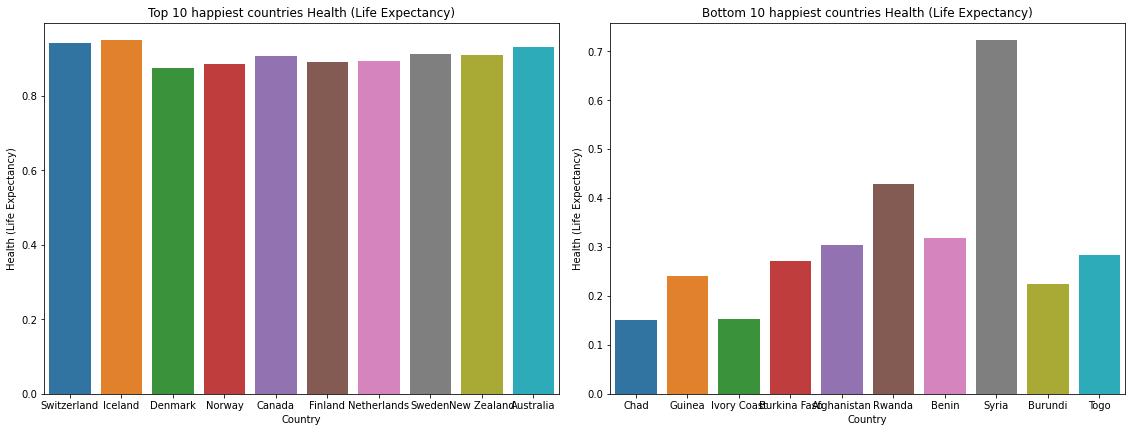

In [19]:
fig, axes = plt.subplots(1,2, figsize=(16,6))
plt.tight_layout(pad=2)
xlabels= top_10.country
axes[0].set_title('Top 10 happiest countries Health (Life Expectancy)')
sns.barplot(x=top_10.country, y=top_10.health, ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Health (Life Expectancy)')

xlabels= bottom_10.country
axes[1].set_title('Bottom 10 happiest countries Health (Life Expectancy)')
#axes[1].set_xtickslabels(xlables, rotation=45,ha='right')
sns.barplot(x=bottom_10.country, y=bottom_10.health, ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Health (Life Expectancy)')

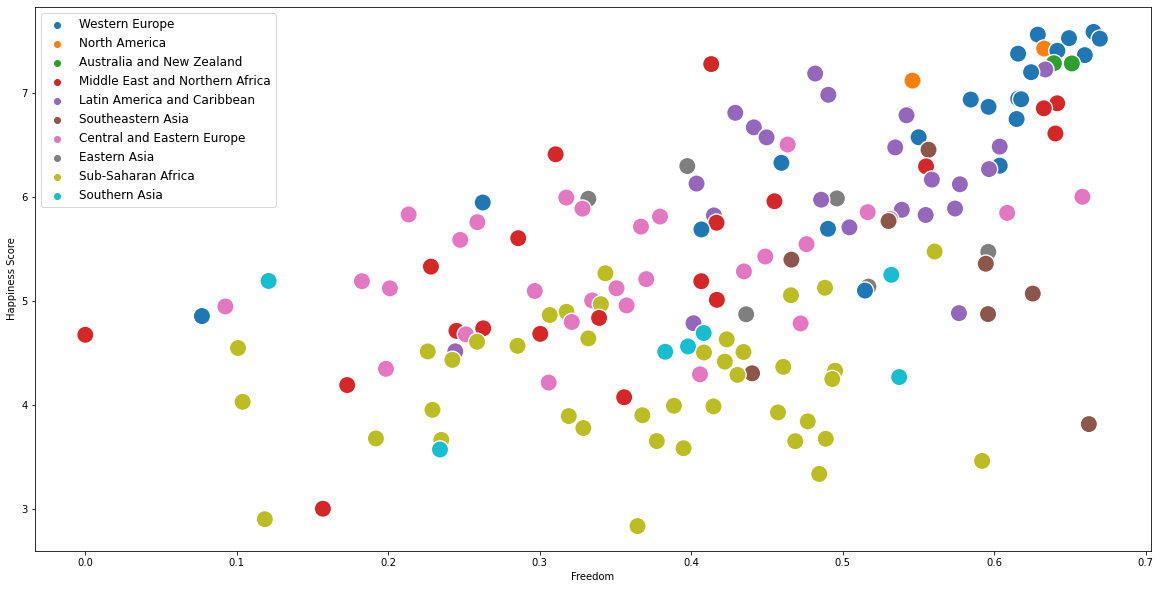

In [20]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = happy_df.freedom, y = happy_df.happiness_score, hue=happy_df.region, s= 300)
plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.show()

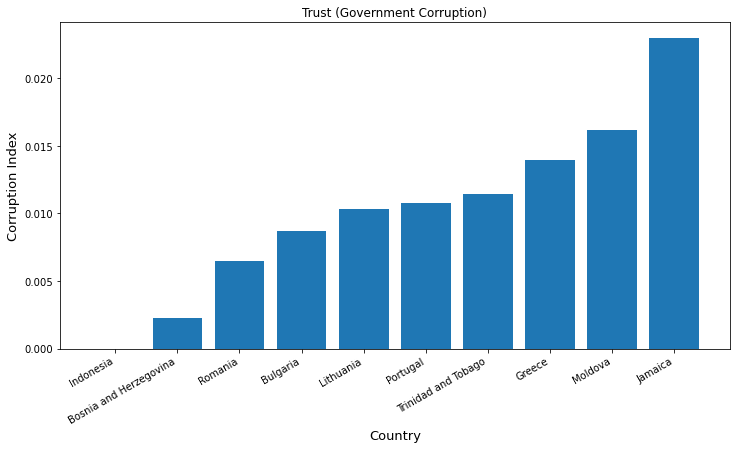

In [21]:
country = happy_df.sort_values(by='trust').head(10)
plt.figure(figsize = (12,6))
plt.title('Trust (Government Corruption)')
plt.xlabel('Country', fontsize =13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country, country.trust)
plt.show()

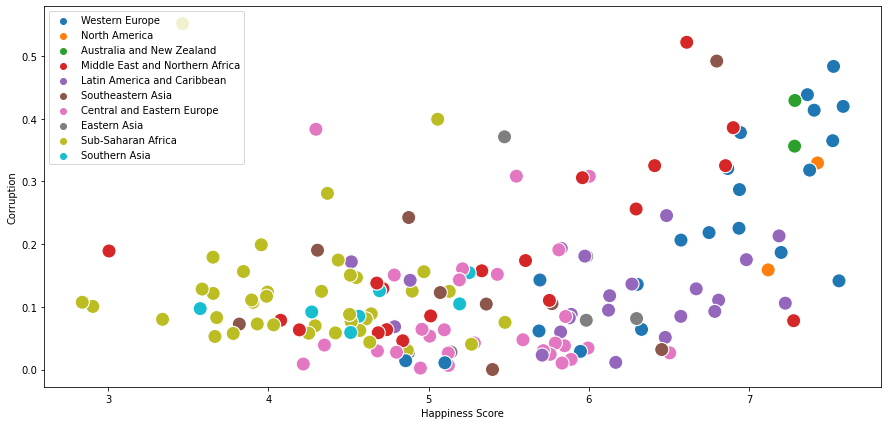

In [22]:
# Corruption vs happiness
plt.figure(figsize = (15,7))
sns.scatterplot(x=happy_df.happiness_score, y = happy_df.trust, hue = happy_df.region, s=200)
plt.legend(loc='upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')
plt.show()


In [23]:
happy_df.dtypes

country               object
region                object
happiness_score      float64
standard_error       float64
gdp                  float64
family               float64
health               float64
freedom              float64
trust                float64
generosity           float64
dystopia_residual    float64
dtype: object

In [24]:
data=happy_df.drop(['country','region'], axis=1)
data

,happiness_score,standard_error,gdp,family,health,freedom,trust,generosity,dystopia_residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [25]:
y = data['happiness_score']
X = data.drop('happiness_score', axis = 1)

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [27]:
X

,standard_error,gdp,family,health,freedom,trust,generosity,dystopia_residual
0,0.131954,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895,0.668630
1,0.256311,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198,0.725030
2,0.124947,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947,0.660889
3,0.171549,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983,0.652724
4,0.143943,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602,0.648584
...,...,...,...,...,...,...,...,...
153,0.136429,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314,0.104425
154,0.152638,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432,0.398557
155,0.267370,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790,0.000000
156,0.574926,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864,0.459573


# Model Building

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=300)

In [30]:
print('X-train shape:',X_train.shape)
print('Y-train shape:',y_train.shape)
print('X-test shape:',X_test.shape)
print('Y-test shape:',y_test.shape)

X-train shape: (110, 8)
Y-train shape: (110,)
X-test shape: (48, 8)
Y-test shape: (48,)


# Training

# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
print('Regression R2 :',lr.score(X_test, y_test))

Regression R2 : 0.9999999313671252


In [33]:
y_pred=lr.predict(X_test)
y_pred

array([7.37814683, 2.90455721, 5.1922882 , 4.57141605, 5.26803135,
       4.88445825, 6.90136009, 5.94826386, 7.3636319 , 4.677418  ,
       6.26929442, 4.83927069, 3.90368786, 4.64231144, 3.46469115,
       4.21849   , 6.98260081, 4.89755666, 4.5170256 , 5.84766   ,
       6.50512561, 5.25280272, 7.11958106, 6.81026582, 4.50718614,
       7.19985953, 4.43556794, 3.66720768, 6.61130252, 6.86722058,
       3.99473227, 4.56472067, 5.00706736, 4.07673541, 5.85523174,
       5.12317995, 5.42856378, 3.78075875, 6.93736873, 6.48510104,
       4.33208732, 5.71589925, 5.33254065, 5.88902925, 5.98706065,
       6.57408726, 4.30695232, 5.82822639])

### Finding the accuracy using MSE

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(y_test,y_pred)

9.18313383813789e-08

# Decision Tree Regressor

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [37]:
print('DT Regressor Score :',dtr.score(X_test, y_test))

DT Regressor Score : 0.787055527198884


In [38]:
y_pred1=dtr.predict(X_test)
y_pred1

array([6.946, 2.839, 5.754, 5.589, 4.55 , 5.77 , 6.853, 5.212, 6.946,
       5.124, 6.67 , 4.8  , 4.788, 3.896, 3.819, 4.857, 7.278, 4.867,
       4.55 , 5.689, 6.455, 4.419, 6.575, 7.278, 5.057, 6.75 , 4.786,
       4.292, 6.853, 6.302, 3.931, 5.013, 4.8  , 4.786, 6.168, 5.212,
       5.791, 3.931, 6.575, 6.575, 5.77 , 5.833, 5.212, 4.55 , 5.96 ,
       6.786, 4.518, 6.003])

In [39]:
mean_squared_error(y_test,y_pred1)

0.2849214166666667

# Random forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [41]:
rfr.score(X_test,y_test)

0.9285397813058887

In [42]:
y_pred2=rfr.predict(X_test)
y_pred2

array([7.08461, 3.60818, 5.4258 , 4.43561, 4.83138, 5.17585, 6.973  ,
       6.05864, 7.26809, 4.98858, 6.08674, 4.86478, 4.20738, 4.9868 ,
       3.90736, 4.85789, 6.34   , 4.97669, 4.76163, 6.03938, 6.38011,
       4.95593, 6.76521, 6.29452, 4.76693, 7.14574, 4.40595, 4.04567,
       6.48873, 6.65816, 4.27926, 4.82285, 5.12191, 4.20273, 5.86654,
       5.24675, 5.44122, 4.22929, 6.7145 , 6.37278, 4.9748 , 5.88581,
       5.22069, 5.46517, 6.10676, 6.26022, 3.86565, 5.74892])

In [43]:
mean_squared_error(y_test,y_pred2)

0.09561434714791678

# Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

scr = cross_val_score(lr, X, y, cv = 5)
print("Cross Validation score of logistic Regression model :", scr.mean())

Cross Validation score of logistic Regression model : 0.9999981871007761


# Save the model

In [45]:
import joblib
#save the model as pickle in file
joblib.dump(scr,'world_happiness_report.pkl')

['world_happiness_report.pkl']